In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
# Load data

LendingClub_DF = pd.read_csv("C:/Users/stunt/OneDrive/Desktop/UCLA Material/Course Material/Machine Learning/Assignments/Wk3/LendingClub_LoanStats3a_v12.csv")
LendingClub_DF

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.870000,B,B2,...,f,0,0.00,5863.1553,5833.83980,5000.00000,863.15997,0.000000,0.0,0.00
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.830002,C,C4,...,f,0,0.00,1014.5300,1014.53000,456.45999,435.17001,0.000000,122.9,1.11
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.330002,C,C5,...,f,0,0.00,3005.6667,3005.66990,2400.00000,605.66998,0.000000,0.0,0.00
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.310000,C,C1,...,f,0,0.00,12231.8900,12231.89000,10000.00000,2214.91990,16.969999,0.0,0.00
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.790001,B,B5,...,f,205.78,205.78,3852.2800,3852.28000,2794.22000,1058.06010,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,92174,2500,2500,1075.0,36 months,0.0807,78.419998,A,A4,...,f,0,0.00,2822.9692,1213.88000,2500.00000,322.97000,0.000000,0.0,0.00
39782,90665,90607,8500,8500,875.0,36 months,0.1028,275.380000,C,C1,...,f,0,0.00,9913.4922,1020.51000,8500.00000,1413.49000,0.000000,0.0,0.00
39783,90395,90390,5000,5000,1325.0,36 months,0.0807,156.840000,A,A4,...,f,0,0.00,5272.1611,1397.12000,5000.00000,272.16000,0.000000,0.0,0.00
39784,90376,89243,5000,5000,650.0,36 months,0.0743,155.380000,A,A2,...,f,0,0.00,5174.1987,672.65997,5000.00000,174.20000,0.000000,0.0,0.00


In [2]:
LendingClub = LendingClub_DF[(LendingClub_DF['loan_status'] == "Fully Paid") | \
(LendingClub_DF['loan_status'] == "Charged Off")]
# Create a dummy variable ("Default")
LendingClub['Default'] = LendingClub['loan_status'] == "Charged Off"
LendingClub['Default'] = LendingClub['Default'].astype('int')

np.mean(LendingClub["Default"])

# Create dummies for grade variable
grade_dummy = pd.get_dummies(LendingClub.grade)
# Logistic regression
log_reg = sm.Logit(LendingClub['Default'], grade_dummy).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.392196
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39405
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.04651
Time:                        15:53:22   Log-Likelihood:                -15457.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
A             -2.7554      0.042    -65.554      0.000      -2.838      -2.673
B             -1.9940      0.

In [7]:
# Likelihood ratio chi-squared statistic
log_reg.llr

1508.0972567890021

In [6]:
# The chi-squared probability of getting a log-likelihood ratio statistic greater than test statistic.
log_reg.llr_pvalue

0.0

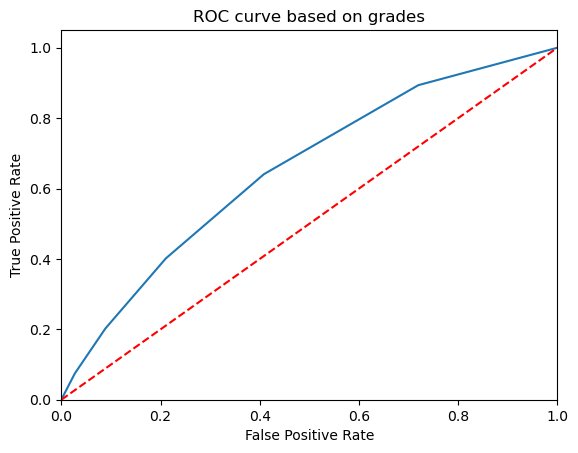

In [9]:
# Predicted values from the logistic regression
LendingClub['fitted1'] = log_reg.fittedvalues
# Compute probability
LendingClub['prob1'] = (np.exp(LendingClub['fitted1']))/(1 + np.exp(LendingClub['fitted1']))
# Average probability
average = np.mean(LendingClub['Default'])
# Lift table
lift = pd.DataFrame(LendingClub.groupby('grade').mean()[['Default', 'prob1']])
lift['Lift Factor'] = lift['Default']/average
lift

# Plot a ROC curve
fpr, tpr, thresholds = roc_curve(LendingClub['Default'], LendingClub['prob1'])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve based on grades')
plt.show()

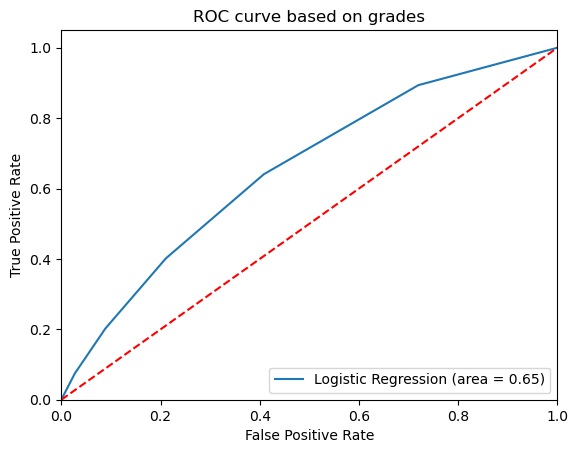

In [11]:
# Logistic regression using scikit-learn
scikit_logreg = LogisticRegression()
logreg2 = scikit_logreg.fit(grade_dummy, LendingClub['Default'])
# Plot a ROC curve
logit_roc_auc = roc_auc_score(LendingClub['Default'], scikit_logreg.predict_proba(grade_dummy)[:,1])
fpr, tpr, thresholds = roc_curve(LendingClub['Default'], scikit_logreg.predict_proba(grade_dummy)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve based on grades')
plt.legend(loc="lower right")
plt.show()

In [12]:
# Logistic regression using loan_amnt and annual_inc
LendingClub['c'] = 1 # Add constant
X = LendingClub[['loan_amnt', 'annual_inc', 'c']]
logreg3 = sm.Logit(LendingClub['Default'], X).fit()
# Print the regression results
print(logreg3.summary())

# Predicted values from the logistic regression (Xb)
LendingClub['fitted2'] = logreg3.fittedvalues
# Compute probability
LendingClub['prob2'] = (np.exp(LendingClub['fitted2']))/ \
(1 + np.exp(LendingClub['fitted2']))
LendingClub['Decile_Rank'] = pd.qcut(LendingClub['prob2'], 10, labels = False) + 1
# Lift table
lift_table = pd.DataFrame(LendingClub.groupby('Decile_Rank').mean()['Default'])
lift_table['mean_response'] = lift_table['Default']/np.mean(LendingClub['Default'])
lift_table.columns = ['mean', 'mean_response'] # Rename column
print(lift_table)

Optimization terminated successfully.
         Current function value: 0.406307
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39409
Method:                           MLE   Df Model:                            2
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.01221
Time:                        22:28:17   Log-Likelihood:                -16013.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                 1.121e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan_amnt   3.484e-05   2.08e-06     16.742      0.000    3.08e-05    3.89e-05
annual_inc -7.089e-06   4.66e

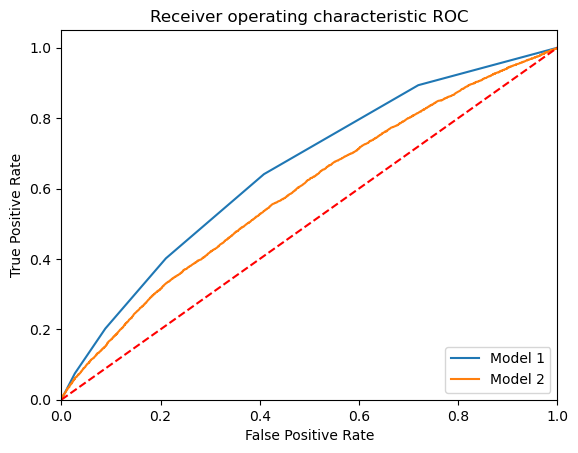

In [13]:
# Compare ROC curves
fpr2, tpr2, thresholds2 = roc_curve(LendingClub['Default'], LendingClub['prob2'])
plt.figure()
plt.plot(fpr, tpr, label = "Model 1")
plt.plot(fpr2, tpr2, label = "Model 2")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(prop={'size':10}, loc='lower right')

In [14]:
# Logistic regression using loan_amnt, annual_inc, term, and int_rate
# Term dummy
term_dummy = pd.get_dummies(LendingClub.term)
term_dummy.columns = ['term30', 'term60']
LendingClub = LendingClub.join(term_dummy)
# Now that we add term dummies, we don't need to add constant separately
X = LendingClub[['loan_amnt', 'annual_inc', 'int_rate', 'term30', 'term60']]
logreg4 = sm.Logit(LendingClub['Default'], X).fit()
# Print the regression results
print(logreg4.summary())

# Predicted values from the logistic regression (Xb)
LendingClub['fitted3'] = logreg4.fittedvalues
# Compute probability
LendingClub['prob3'] = (np.exp(LendingClub['fitted3']))/ \
(1 + np.exp(LendingClub['fitted3']))
LendingClub['Decile_Rank'] = pd.qcut(LendingClub['prob3'], 10, labels = False) + 1
# Lift table
lift_table = pd.DataFrame(LendingClub.groupby('Decile_Rank').mean()['Default'])
lift_table['mean_response'] = lift_table['Default']/np.mean(LendingClub['Default'])
lift_table.columns = ['mean', 'mean_response'] # Rename column
print(lift_table)

Optimization terminated successfully.
         Current function value: 0.385901
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                39412
Model:                          Logit   Df Residuals:                    39407
Method:                           MLE   Df Model:                            4
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.06182
Time:                        22:29:26   Log-Likelihood:                -15209.
converged:                       True   LL-Null:                       -16211.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan_amnt   1.176e-06   2.31e-06      0.509      0.611   -3.35e-06    5.71e-06
annual_inc -6.117e-06   4.64e

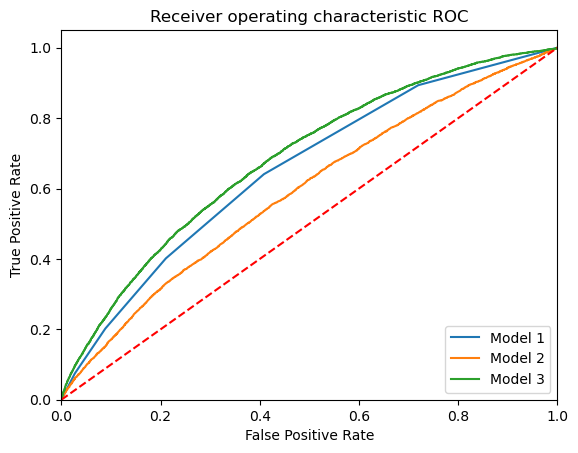

In [15]:
# Compare ROC curves
fpr3, tpr3, thresholds3 = roc_curve(LendingClub['Default'], LendingClub['prob3'])
plt.figure()
plt.plot(fpr, tpr, label = "Model 1")
plt.plot(fpr2, tpr2, label = "Model 2")
plt.plot(fpr3, tpr3, label = "Model 3")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(prop={'size':10}, loc='lower right')